### Perspective Transformation

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(4000, 3000, 3)


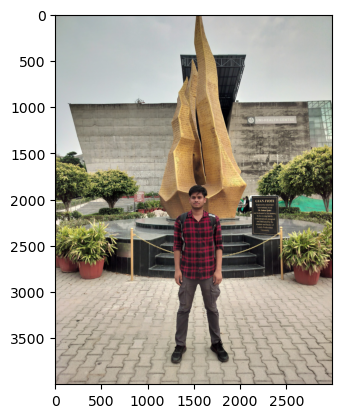

In [56]:
image = cv2.imread("../READING_AND_WRITING_IMAGES/rajnish.jpg")
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
print(image_rgb.shape)

In [57]:
rows, cols, _ = image_rgb.shape

input_points = np.float32([[100,50],[cols-50,50],[50,rows-50],[cols-50,rows-50]])

output_points = np.float32([[10,100],[cols-100,50],[100,rows-10],[cols-50,rows-100]])

"""
Transformation matrix for perspective transfomation
3*3

a,b,c
d,e,f
g,h,1

a,b,c is reponsible for horizontal scaling , rotation and translation
d,e,f is reponsible for vertical scaling , rotation and translation
g,h is responsible for components that account for depth and skew
"""

M = cv2.getPerspectiveTransform(input_points,output_points)
print(M)

[[ 1.02574041e+00  3.70573074e-02 -9.44190610e+01]
 [-1.73695224e-02  1.03038502e+00  5.02961504e+01]
 [ 3.76200497e-06  8.16585734e-06  1.00000000e+00]]


(np.float64(-0.5), np.float64(3999.5), np.float64(2999.5), np.float64(-0.5))

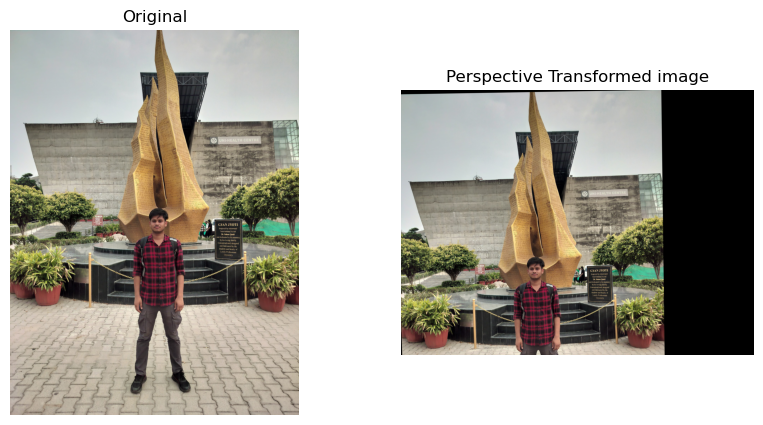

In [58]:
perspective_image = cv2.warpPerspective(image_rgb,M,(rows,cols))

plt.figure(figsize=(10,5))

# plt.shubplot(row,col,index)
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("Perspective Transformed image")
plt.axis('off')

### Affine Transformation

(np.float64(-0.5), np.float64(2999.5), np.float64(3999.5), np.float64(-0.5))

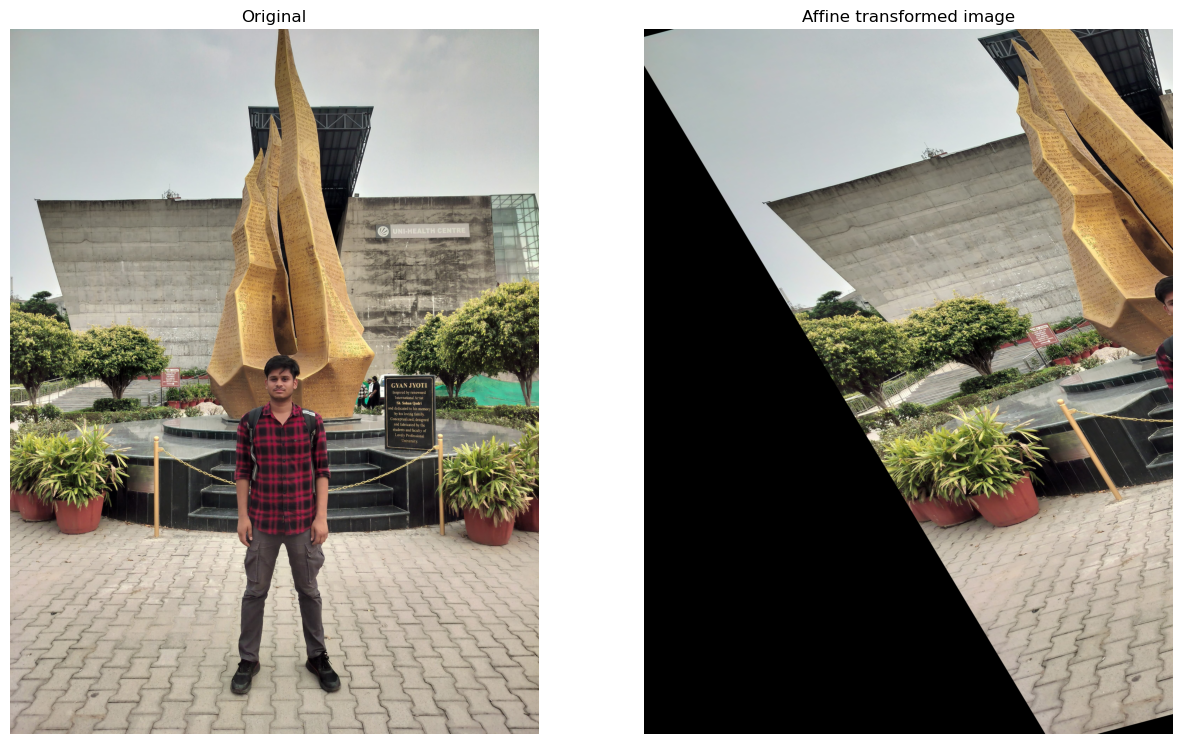

In [59]:
input_points = np.float32([[50,50],[200,50],[50,200]])

output_points = np.float32([[10,100],[200,50],[100,250]])

# Affine transformaiton matrix
M = cv2.getAffineTransform(input_points,output_points)

affine_image = cv2.warpAffine(image_rgb,M,(cols,rows))

plt.figure(figsize=(15,20))

# plt.subplot(row,col,index)
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(affine_image)
plt.title("Affine transformed image")
plt.axis('off')

### Rotation

(np.float64(-0.5), np.float64(2999.5), np.float64(3999.5), np.float64(-0.5))

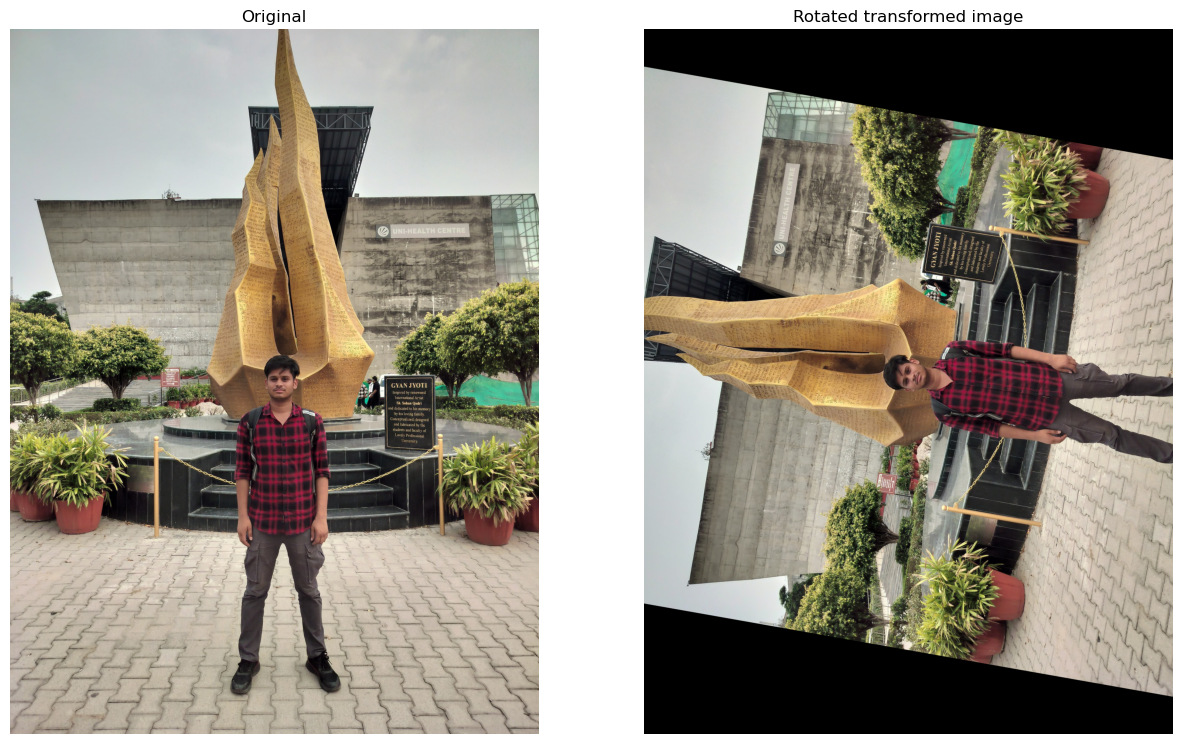

In [60]:
angle = 80   #angle in degree
center = (cols // 2 ,rows // 2)
scale = 1.0

M = cv2.getRotationMatrix2D(center,angle,scale)

rotated_image = cv2.warpAffine(image_rgb,M,(cols,rows))

plt.figure(figsize=(15,20))

# plt.subplot(row,col,index)
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title("Rotated transformed image")
plt.axis('off')

### Shearing

(np.float64(-0.5), np.float64(4999.5), np.float64(3999.5), np.float64(-0.5))

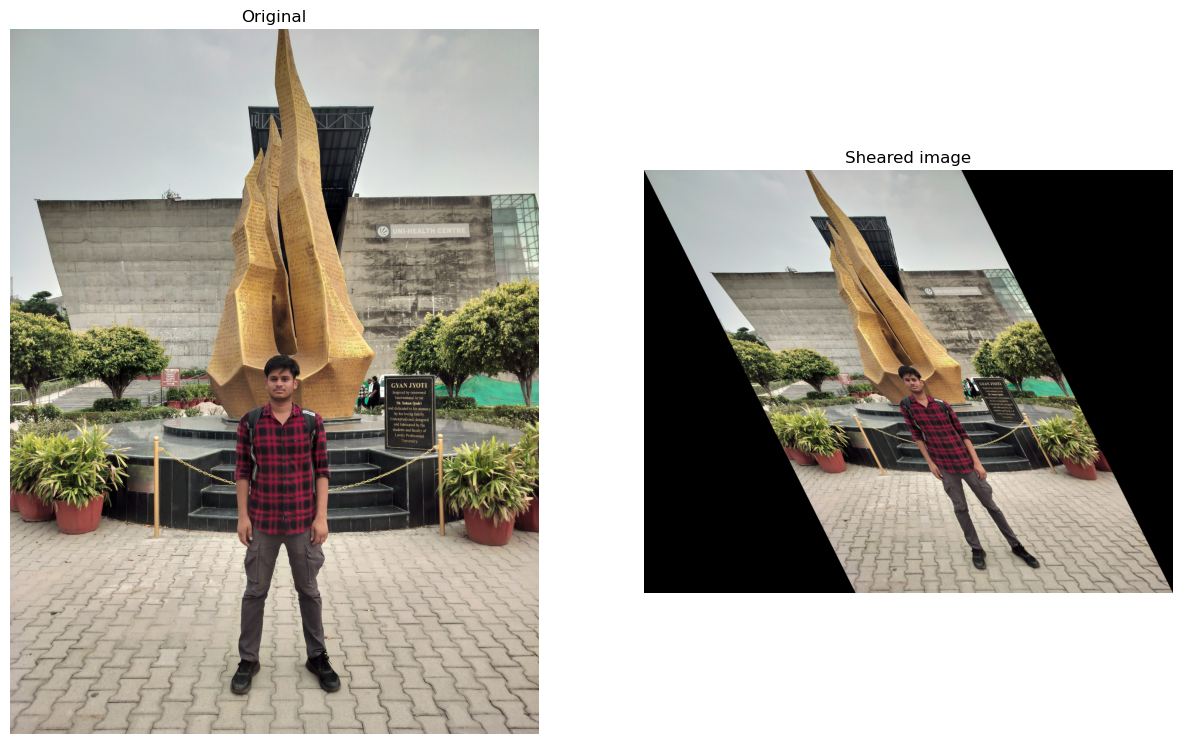

In [61]:
shear_x ,shear_y = 0.5,0

M = np.float32([[1,shear_x,0],[shear_y,1,0]])

sheared_image = cv2.warpAffine(image_rgb,M,(cols+int(shear_x*rows),rows))

plt.figure(figsize=(15,20))

# plt.subplot(row,col,index)
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sheared_image)
plt.title("Sheared image")
plt.axis('off')

### Translation

(np.float64(-0.5), np.float64(2999.5), np.float64(3999.5), np.float64(-0.5))

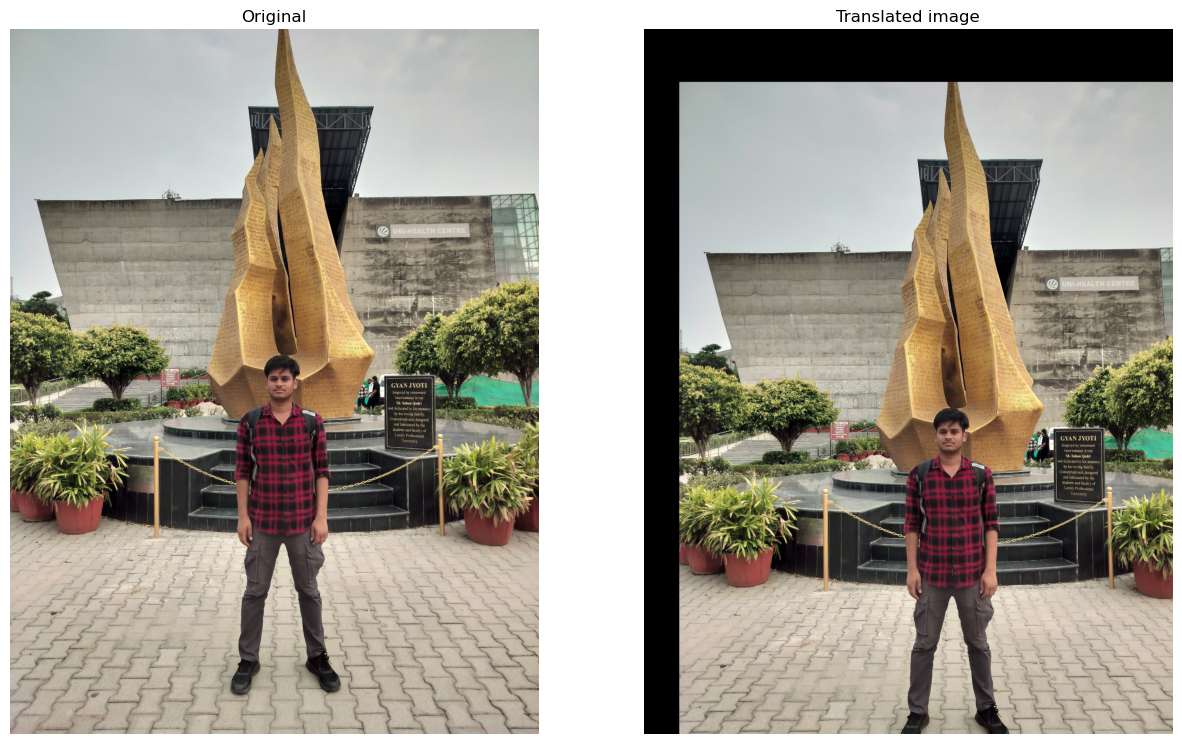

In [62]:
tx , ty = 200 , 300

M = np.float32([[1,0,tx],
                [0,1,ty]])
translated_image = cv2.warpAffine(image_rgb,M,(cols,rows))

plt.figure(figsize=(15,20))

# plt.subplot(row,col,index)
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("Translated image")
plt.axis('off')